<a href="https://colab.research.google.com/github/ljgonzalezlara/market-segmentation/blob/main/Market_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://catalog.data.gov/dataset/demographics-0be32

#Load Dataset & Inspect

In [1]:
# Standard libraries
import os

# Third-party libraries
import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Google Colab-specific
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
# Change directory & Load Dataset
os.chdir('/content/drive/MyDrive/Data Projects/')
df = pd.read_csv('LakeCounty_Demographics.csv')
df

,OBJECTID,ZIP,Total_Pop,White__,African_Am,Asian__,Hispanic_o,No_English,Under_5yea,Under_18ye,...,Female_,High_Schoo,Associate_,Bachelor_D,Food_Stamp,Med_Income,No_HS,Poverty,Shape__Area,Shape__Length
0,1,60002,24305,88.648426,1.197285,2.493314,5.315779,10.2,5.6,24.1,...,46.858671,94.3,8.2,29.3,7.528748,75928,5.7,10.5,1.149062e+09,215525.155184
1,2,60010,44416,82.598613,0.569615,10.340868,4.723523,18.8,4.6,24.5,...,51.193264,97.2,5.4,64.3,2.462192,122789,2.8,4.9,8.027354e+08,178637.109618
2,3,60015,27373,88.528842,0.895043,4.460600,4.946480,17.0,4.7,26.5,...,51.006466,97.6,3.5,71.5,1.739495,130140,2.5,3.5,3.674576e+08,111400.890558
3,4,60020,10246,80.665626,1.542065,4.509077,12.590279,22.3,8.6,21.4,...,51.912942,88.9,7.9,22.7,14.162791,55431,11.2,11.2,1.666177e+08,92363.084625
4,5,60030,36563,77.594836,2.885431,5.688811,11.566338,16.1,5.7,25.3,...,50.214698,93.8,6.2,45.5,7.104066,81055,6.2,5.5,8.455179e+08,247258.224672
5,6,60031,37920,65.886076,7.858650,10.181962,13.035338,22.6,4.7,26.6,...,51.645570,94.1,8.3,45.2,5.273717,83500,6.0,4.9,5.271176e+08,163995.181561
6,7,60035,29837,86.721185,2.279050,2.460033,7.199115,15.9,5.5,25.2,...,50.940108,96.3,3.5,69.5,2.725385,115372,3.8,6.7,3.457929e+08,115796.723819
7,8,60040,5400,48.703704,2.925926,1.759259,46.296296,55.3,7.6,23.3,...,52.074074,81.3,7.5,32.6,9.607843,54176,18.8,13.3,1.780943e+07,25907.372467
8,9,60042,8556,82.374942,0.759701,0.736325,12.727910,18.4,5.4,27.0,...,51.566152,90.4,7.9,23.1,8.375796,63792,9.7,11.4,4.517757e+07,45385.395226
9,10,60044,9683,84.426314,0.919137,7.311784,5.225653,13.6,4.1,22.6,...,52.669627,96.6,3.7,69.6,3.787879,93849,3.4,5.4,2.127777e+08,92539.708731


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   OBJECTID       27 non-null     int64  
 1   ZIP            27 non-null     int64  
 2   Total_Pop      27 non-null     int64  
 3   White__        27 non-null     float64
 4   African_Am     27 non-null     float64
 5   Asian__        27 non-null     float64
 6   Hispanic_o     27 non-null     float64
 7   No_English     27 non-null     float64
 8   Under_5yea     27 non-null     float64
 9   Under_18ye     27 non-null     float64
 10  F18to64year    27 non-null     float64
 11  F65years_an    27 non-null     float64
 12  Male_          27 non-null     float64
 13  Female_        27 non-null     float64
 14  High_Schoo     27 non-null     float64
 15  Associate_     27 non-null     float64
 16  Bachelor_D     27 non-null     float64
 17  Food_Stamp     27 non-null     float64
 18  Med_Income  

#Clean Data & Preprocessing

Checked for missing values — none found. Dataset is small and visually confirmed, but verified with code for completeness.

In [4]:
# Check for missing values
df.isnull().sum()

,0
OBJECTID,0
ZIP,0
Total_Pop,0
White__,0
African_Am,0
Asian__,0
Hispanic_o,0
No_English,0
Under_5yea,0
Under_18ye,0


In [5]:
# Remove duplicated rows
df.drop_duplicates(inplace=True)
df.shape

(27, 23)

12,677,549,086.231817 square feet = 444 square miles

Units of measurement were not indicated in dataset. [Total area of Lake County](https://https://data.census.gov/profile/Lake_County,_Illinois?g=050XX00US17097) indicates the units of measurement are in square feet.

In [6]:
# Find units of measurement
df['Shape__Area'].sum()

np.float64(12677549086.231817)

Lake County uses [Esri's ArcGIS platform](https://https://services3.arcgis.com/HESxeTbDliKKvec2/arcgis/rest/services/LakeCounty_Health/FeatureServer/layers), where esriGeometryPolygon "area" represents a geometry type that defines a closed area and "length" refers to the perimeter of the polygon, which is the total distance around its outer boundary. This indicates the length is likely units in feet.

In [7]:
# Find units of measurement
df['Shape__Length'].sum()

np.float64(3952442.16599922)

In [8]:
df.columns

Index(['OBJECTID', 'ZIP', 'Total_Pop', 'White__', 'African_Am', 'Asian__',
       'Hispanic_o', 'No_English', 'Under_5yea', 'Under_18ye', 'F18to64year',
       'F65years_an', 'Male_', 'Female_', 'High_Schoo', 'Associate_',
       'Bachelor_D', 'Food_Stamp', 'Med_Income', 'No_HS', 'Poverty',
       'Shape__Area', 'Shape__Length'],
      dtype='object')

In [9]:
# Removing unnecessary fields
df.drop(columns=['OBJECTID', 'No_HS', 'Shape__Length'], inplace=True)
df.columns

Index(['ZIP', 'Total_Pop', 'White__', 'African_Am', 'Asian__', 'Hispanic_o',
       'No_English', 'Under_5yea', 'Under_18ye', 'F18to64year', 'F65years_an',
       'Male_', 'Female_', 'High_Schoo', 'Associate_', 'Bachelor_D',
       'Food_Stamp', 'Med_Income', 'Poverty', 'Shape__Area'],
      dtype='object')

In [10]:
df.rename(columns={
    'White__':      'White',
    'African_Am':   'Black',
    'Asian__':      'Asian',
    'Hispanic_o':   'Hispanic',
    'Under_5yea':   'Under_5',
    'Under_18ye':   'Under_18',
    'F18to64year':  '18_to_64',
    'F65years_an':  '65_Plus',
    'Male_':        'Male',
    'Female_':      'Female',
    'High_Schoo':   'HS_Diploma',
    'Associate_':   'Associate',
    'Bachelor_D':   'Bachelor',
    'Shape__Area':  'Zip_Area'
}, inplace=True)

df.columns

Index(['ZIP', 'Total_Pop', 'White', 'Black', 'Asian', 'Hispanic', 'No_English',
       'Under_5', 'Under_18', '18_to_64', '65_Plus', 'Male', 'Female',
       'HS_Diploma', 'Associate', 'Bachelor', 'Food_Stamp', 'Med_Income',
       'Poverty', 'Zip_Area'],
      dtype='object')

# EDA

Check for outliers

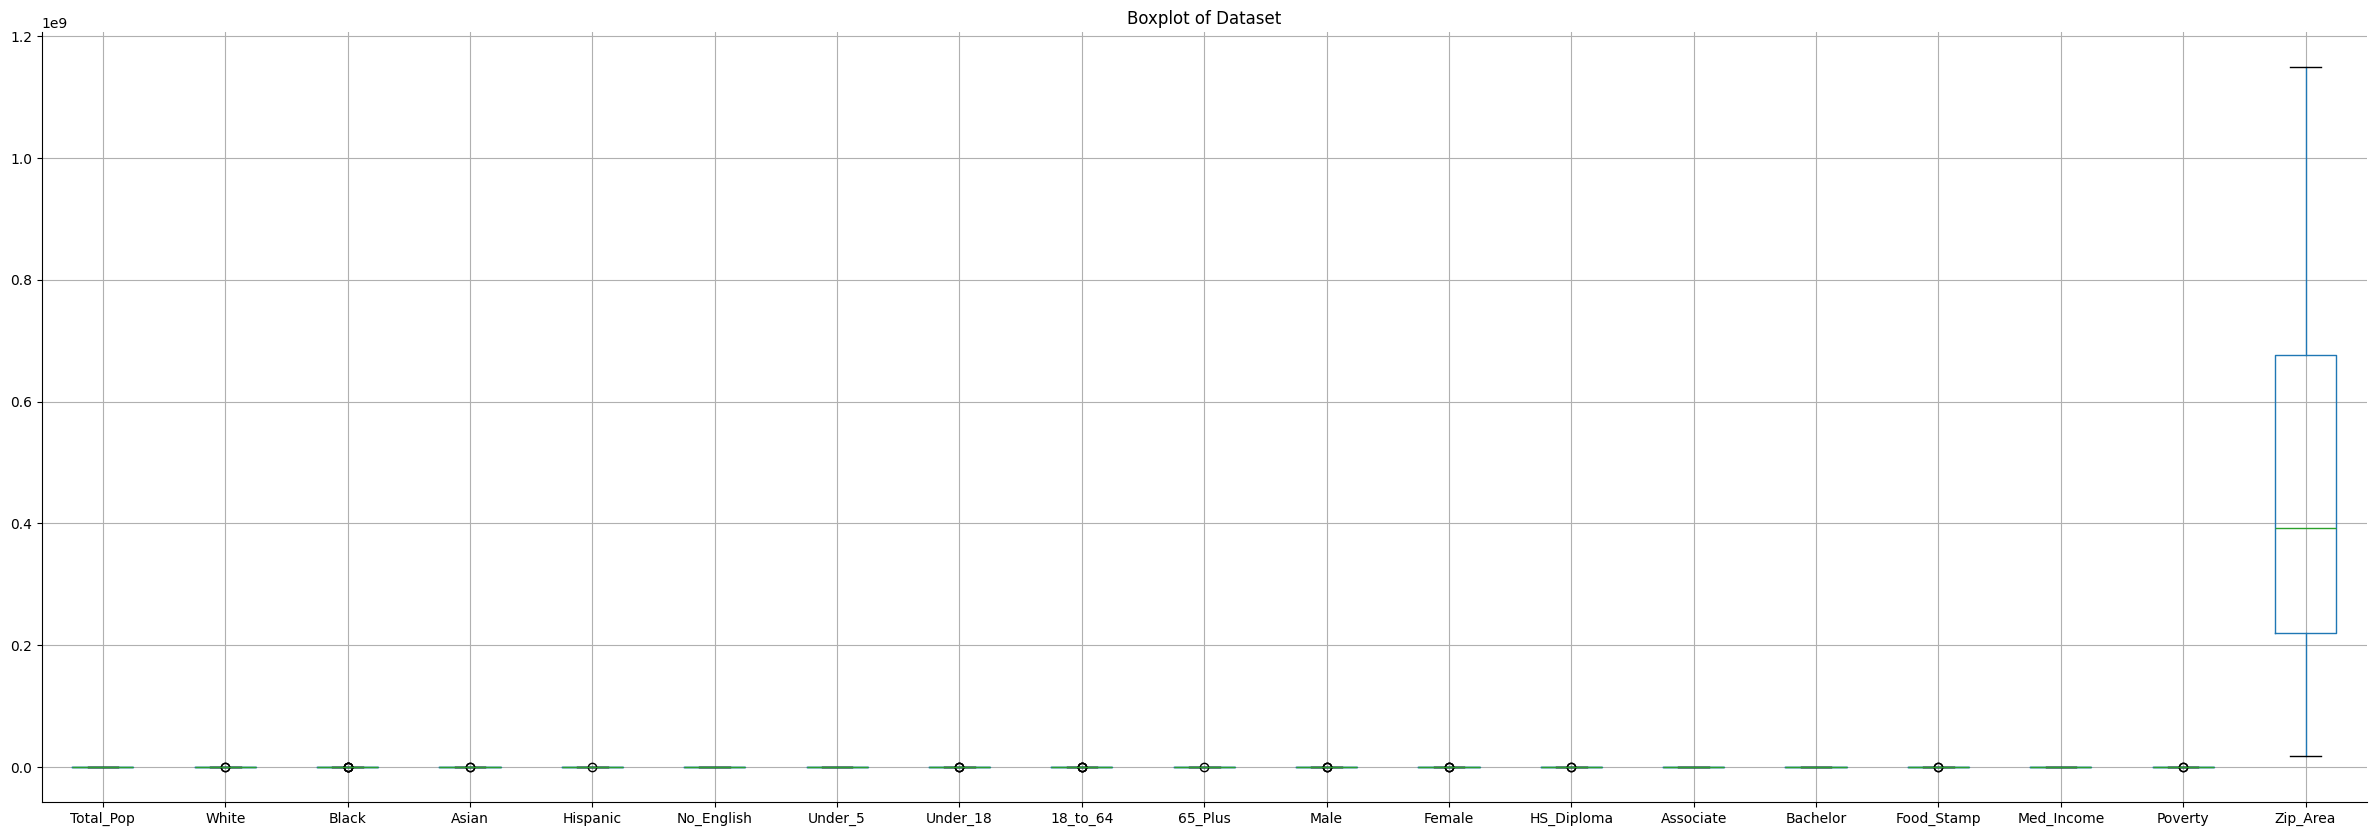

In [11]:
df_filtered = df.drop(columns='ZIP')
df_filtered.boxplot(figsize=(30, 10))
plt.title('Boxplot of Dataset')
sns.despine()
plt.show()

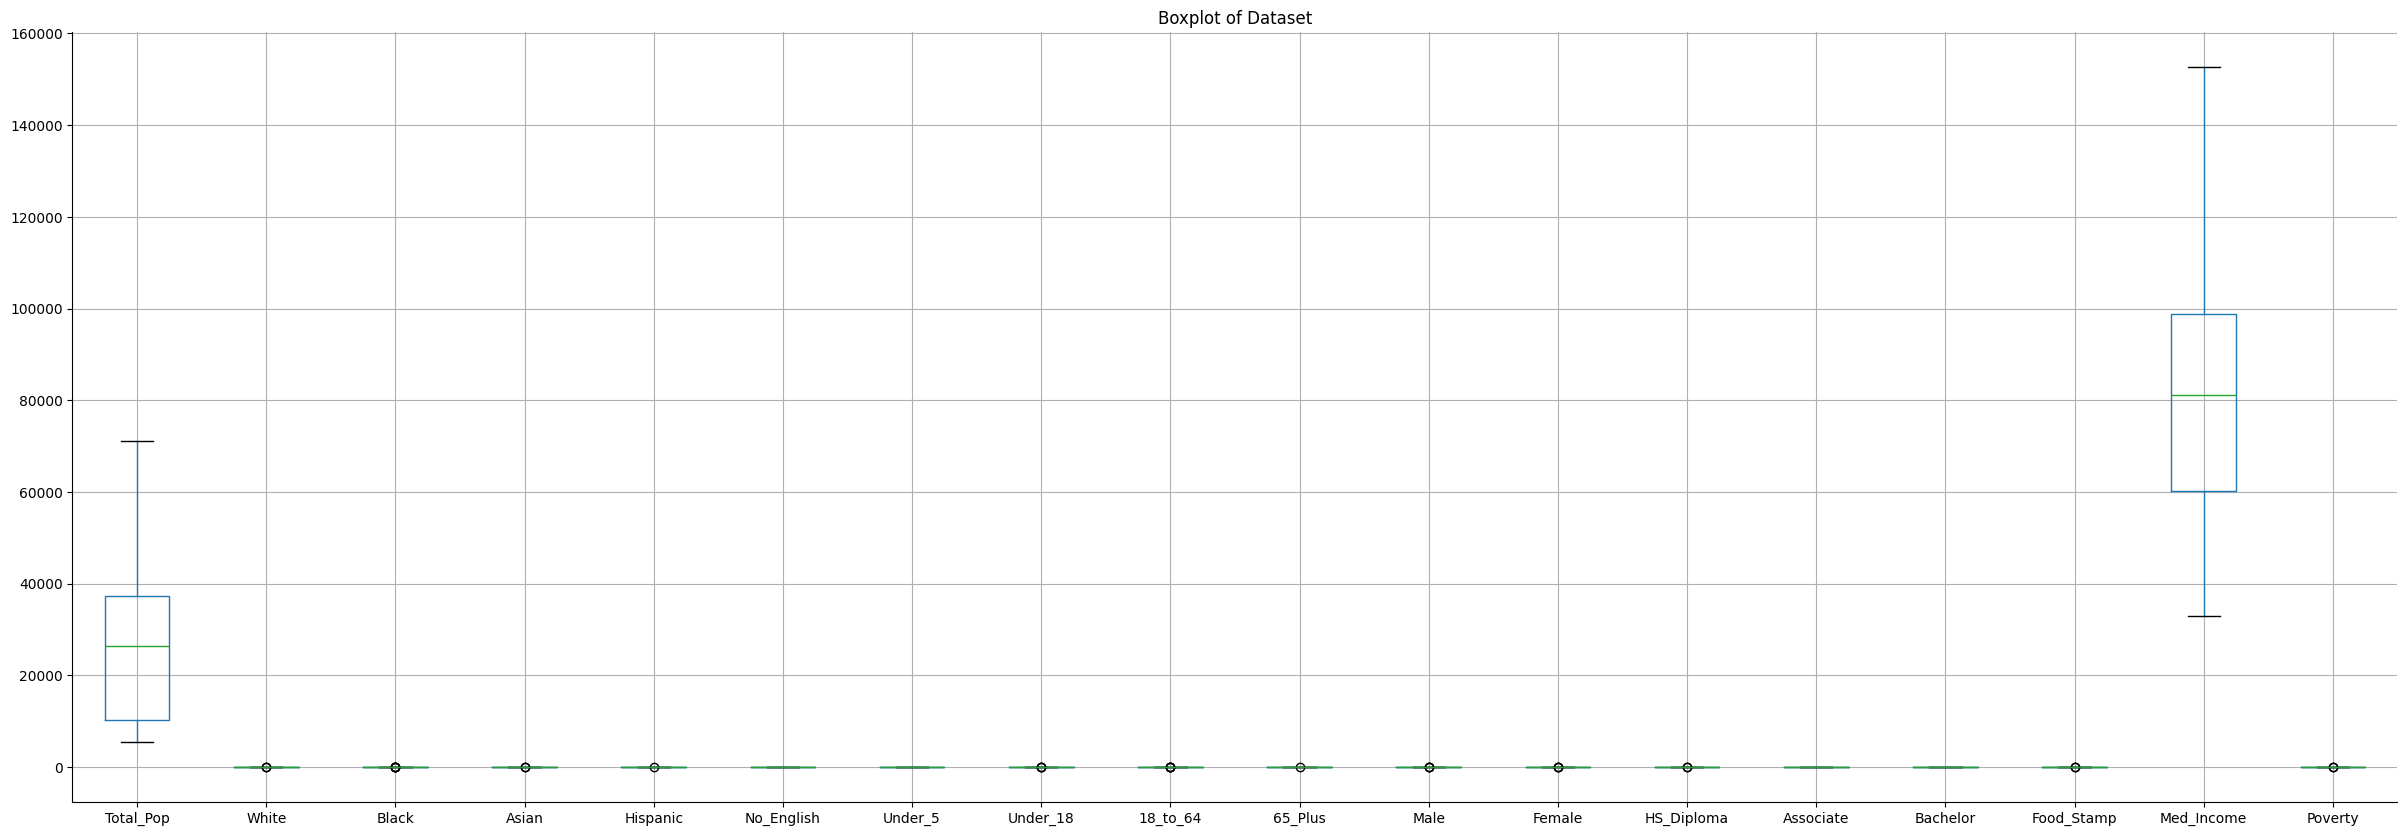

In [12]:
df_filtered = df_filtered.drop(columns='Zip_Area')
df_filtered.boxplot(figsize=(30, 10))
plt.title('Boxplot of Dataset')
sns.despine()
plt.show()

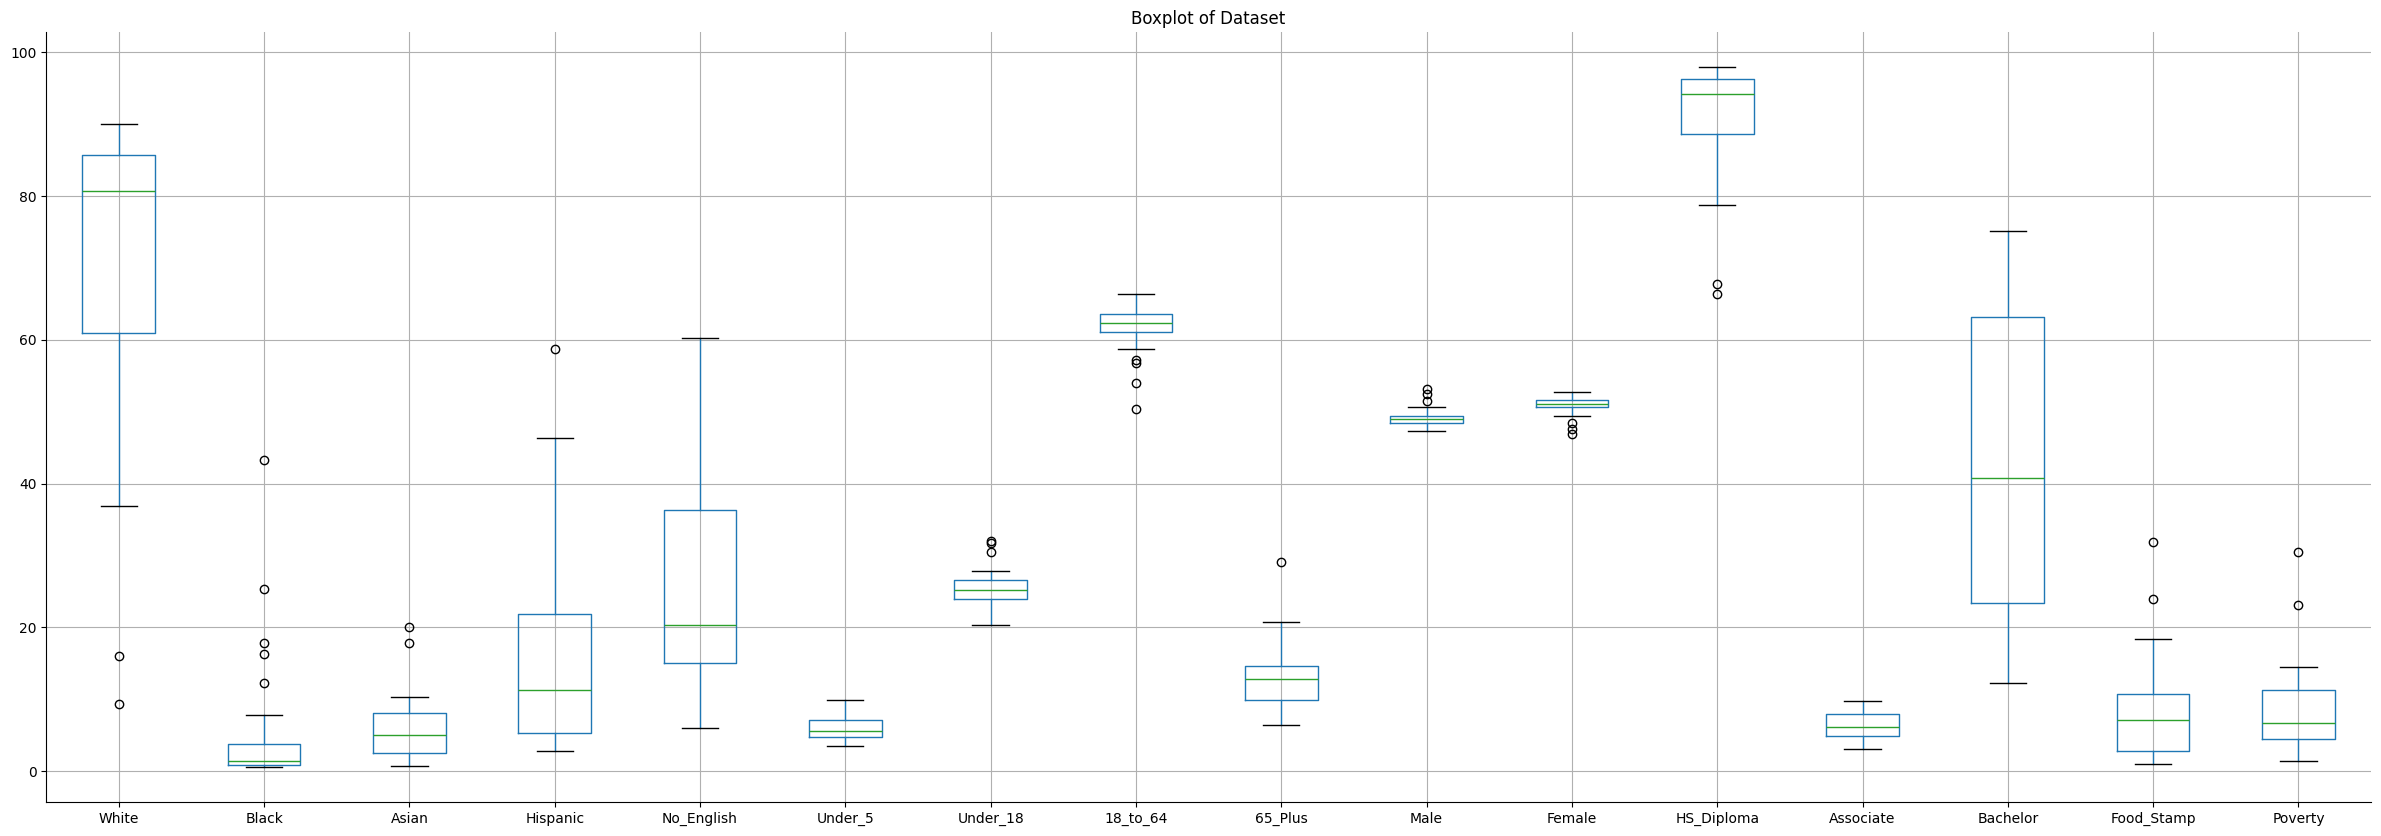

In [13]:
df_filtered = df_filtered.drop(columns=['Total_Pop', 'Med_Income'])
df_filtered.boxplot(figsize=(30, 10))
plt.title('Boxplot of Dataset')
sns.despine()
plt.show()

Data Quality Note:

The sum of race-related demographic fields (White, Black, Asian, Hispanic) per zip code ranges from 96.1% and 99.7%. This slight discrepancy is likely due to rounding, multiracial classifications, or incomplete reporting in the source data. Given the relatively small margin of error, the data was retained as-is for analysis. This is considered acceptable for the purposes of exploratory data analysis and general insights.

In [14]:
# Checking outliers found by adding total races percentages per zip. Keeping as is
df['Race_Total'] = df['White'] + df['Black'] + df['Asian'] + df['Hispanic']

print(df['Race_Total'].max())
print(df['Race_Total'].min())

99.68518518519
96.06520162688


In [15]:
# Checking outliers found by adding ages per zip
df['Age_Total'] = df['Under_5'] + df['Under_18'] + df['18_to_64'] + df['65_Plus']

print(df['Age_Total'].max())
print(df['Age_Total'].min())

109.89999999999999
103.4


Since all rows are beyond 100% totality, Under_5 years of age appears to be counted twice - also included in Under_18 percentage

In [16]:
df['Under_5'].mean()

np.float64(6.022222222222222)

In [17]:
df['Age_Total'] = df['Under_18'] + df['18_to_64'] + df['65_Plus']

print(df['Age_Total'].max())
print(df['Age_Total'].min())

102.2
99.8


Data Quality Note:

As with the Race Total percentages, the sum of all ages per zip code range within an acceptable margin of error. Since the range is between 99.8% and 102.2%, the data will be kept as-is for analysis.

In [18]:
# Keeping data as is
df[df['Age_Total'] > 100]['Age_Total']

,Age_Total
1,100.1
5,100.1
10,100.1
20,100.2
22,100.1
26,102.2


In [19]:
df['Ed_Total'] = df['HS_Diploma']+ df['Associate'] + df['Bachelor']

print(df['Ed_Total'].max())
print(df['Ed_Total'].min())

176.2
83.1


In [20]:
print(df['Ed_Total'].idxmin())

16


In [21]:
df.iloc[16,]

,16
ZIP,6.006400e+04
Total_Pop,1.589800e+04
White,9.372248e+00
Black,4.326330e+01
Asian,2.258146e+00
Hispanic,4.334507e+01
No_English,4.220000e+01
Under_5,9.900000e+00
Under_18,3.200000e+01
18_to_64,5.980000e+01


In [22]:
#Indicates higher education levels include preceding education levels
df[df['Ed_Total'] > 100]['Ed_Total']

,Ed_Total
0,131.8
1,166.9
2,172.6
3,119.5
4,145.5
5,147.6
6,169.3
7,121.4
8,121.4
9,169.9


In [23]:
df.drop(columns=['Race_Total','Age_Total', 'Ed_Total'], inplace=True)

In [24]:
# Last outliers found - keeping because data is useful
df.sort_values('HS_Diploma')[['ZIP', 'HS_Diploma', 'Food_Stamp', 'Poverty']].head()

,ZIP,HS_Diploma,Food_Stamp,Poverty
21,60085,66.4,23.946037,23.1
16,60064,67.8,31.939007,30.5
18,60073,78.8,10.993102,12.8
22,60087,79.6,11.049363,13.6
7,60040,81.3,9.607843,13.3


#Univariate Clustering

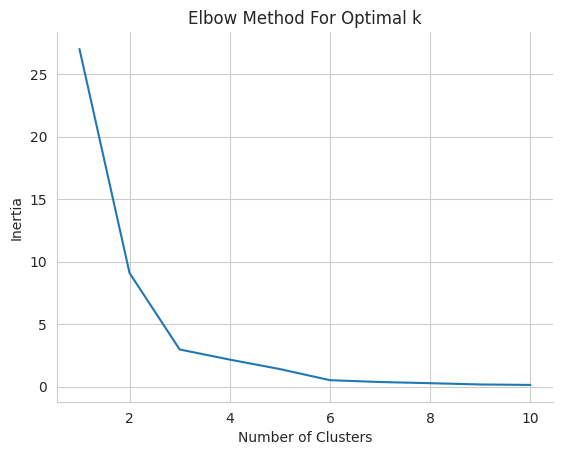

In [25]:
# Step 1: Select and scale the features
scaler_uni = StandardScaler()
scaled_feat_uni = scaler_uni.fit_transform(df[['Med_Income']])

# Step 2: Inertia scores to find optimal number of clusters (Elbow method)
inertia_scores = []
for i in range(1, 11):
    clusters = KMeans(n_clusters=i, random_state=42)
    clusters.fit(scaled_feat_uni)
    inertia_scores.append(clusters.inertia_)

# Step 3: Plot the inertia scores to see the "elbow"
sns.set_style("whitegrid")  # Set global style once
plt.plot(range(1, 11), inertia_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
sns.despine()
plt.show()

In [26]:
# Step 4: Final KMeans clustering using optimal number of clusters
final_kmeans_uni = KMeans(n_clusters=3, random_state=42)
final_kmeans_uni.fit(scaled_feat_uni)
df['Income_Cluster'] = final_kmeans_uni.labels_

# Step 5: Analyze
print(df['Income_Cluster'].value_counts())
print(df.groupby('Income_Cluster')[['Med_Income', 'Poverty', 'Food_Stamp']].mean().sort_values('Med_Income'))

Income_Cluster
2    12
1     9
0     6
Name: count, dtype: int64
                   Med_Income    Poverty  Food_Stamp
Income_Cluster                                      
1                52845.444444  15.477778   15.446695
2                85550.333333   5.608333    5.624190
0               128537.333333   4.500000    2.062333


In [27]:
# Markdown Table
counts_uni = df['Income_Cluster'].value_counts().sort_index()

print("### Cluster Counts\n")
print(counts_uni.to_frame('Count').to_markdown())

means_uni = (
    df.groupby('Income_Cluster')[['Med_Income', 'Poverty', 'Food_Stamp']]
    .mean()
    .sort_values('Med_Income')
)

print("\n### Demographic Characteristics by Cluster\n")
print(means_uni.to_markdown())

### Cluster Counts

|   Income_Cluster |   Count |
|-----------------:|--------:|
|                0 |       6 |
|                1 |       9 |
|                2 |      12 |

### Demographic Characteristics by Cluster

|   Income_Cluster |   Med_Income |   Poverty |   Food_Stamp |
|-----------------:|-------------:|----------:|-------------:|
|                1 |      52845.4 |  15.4778  |     15.4467  |
|                2 |      85550.3 |   5.60833 |      5.62419 |
|                0 |     128537   |   4.5     |      2.06233 |


#Bivariate Clustering

Bivariate Cluster #1

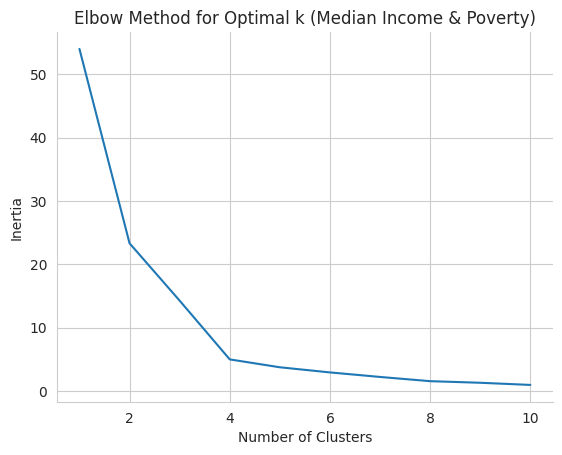

In [28]:
# Step 1: Select and scale the features
features = df[['Med_Income', 'Poverty']]
scaler_bi1 = StandardScaler()
scaled_feat_bi1 = scaler_bi1.fit_transform(features)

# Step 2: Elbow method to determine optimal number of clusters
inertia_scores = []
for i in range(1, 11):
    clusters = KMeans(n_clusters=i, random_state=42)
    clusters.fit(scaled_feat_bi1)
    inertia_scores.append(clusters.inertia_)

# Step 3: Plot the inertia to see the "elbow"
plt.plot(range(1, 11), inertia_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k (Median Income & Poverty)')
sns.despine()
plt.show()

In [29]:
# Step 4: Final KMeans clustering using optimal number of clusters
final_kmeans_bi1 = KMeans(n_clusters=4, random_state=42)
final_kmeans_bi1.fit(scaled_feat_bi1)
df['Income_Poverty_Cluster'] = final_kmeans_bi1.labels_

In [30]:
# Step 5: Analyze
print(df['Income_Poverty_Cluster'].value_counts())
print(df.groupby('Income_Poverty_Cluster')[['Med_Income', 'Poverty', 'Food_Stamp']].mean().sort_values('Med_Income'))

Income_Poverty_Cluster
2    11
1     8
0     6
3     2
Name: count, dtype: int64
                           Med_Income    Poverty  Food_Stamp
Income_Poverty_Cluster                                      
3                        36958.000000  26.800000   27.942522
1                        59702.625000  12.025000   11.332995
2                        86425.090909   5.163636    5.451049
0                       128537.333333   4.500000    2.062333


In [31]:
# Get cluster centers (in scaled space)
centers_scaled_bi1 = final_kmeans_bi1.cluster_centers_

# Inverse transform to original space
centers_original_bi1 = scaler_bi1.inverse_transform(centers_scaled_bi1)

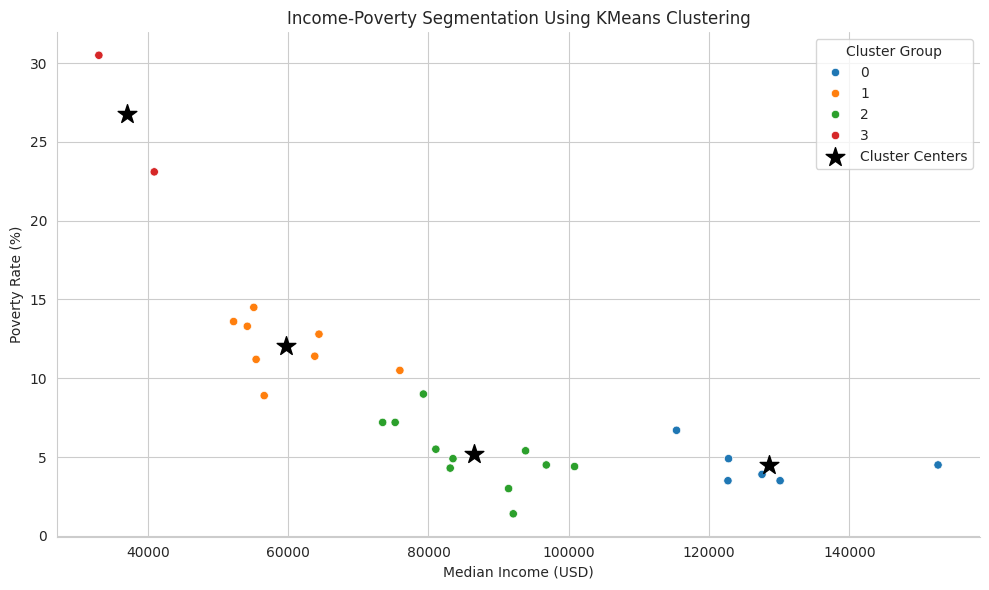

In [32]:
# Scatterplot: Clustering by Income and Poverty
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Med_Income', y='Poverty', hue='Income_Poverty_Cluster', palette='tab10')
plt.scatter(x=centers_original_bi1[:, 0], y=centers_original_bi1[:, 1], s=200, c='black', marker='*', label='Cluster Centers')

plt.title('Income-Poverty Segmentation Using KMeans Clustering')
plt.xlabel('Median Income (USD)')
plt.ylabel('Poverty Rate (%)')
plt.legend(title='Cluster Group')

sns.despine()
plt.tight_layout()
plt.show()

In [33]:
# Label clusters based on data
cluster_means_bi1 = df.groupby('Income_Poverty_Cluster')['Med_Income'].mean().sort_values()

cluster_labels = {}   # Map cluster IDs to labels
for i, cluster_id in enumerate(cluster_means_bi1.index):
    cluster_labels[cluster_id] = ['Low Income - High Poverty', 'Moderate Income - Moderate Poverty', 'Moderate Income - Low Poverty', 'High Income - Low Poverty'][i]

df['Income_Poverty_Tier'] = df['Income_Poverty_Cluster'].map(cluster_labels)  # Apply the labels

In [34]:
# Markdown Table
counts_bi1 = df['Income_Poverty_Cluster'].value_counts().sort_index()

print("### Cluster Counts\n")
print(counts_bi1.to_frame('Count').to_markdown())

means_bi1 = (
    df.groupby(['Income_Poverty_Cluster', 'Income_Poverty_Tier'])[
        ['Med_Income', 'Poverty', 'Food_Stamp']
    ]
    .mean()
    .sort_values('Med_Income')
)

markdown_table_bi1 = means_bi1.reset_index().to_markdown(index=False)

print("\n### Demographic Characteristics by Cluster\n")
print(markdown_table_bi1)

### Cluster Counts

|   Income_Poverty_Cluster |   Count |
|-------------------------:|--------:|
|                        0 |       6 |
|                        1 |       8 |
|                        2 |      11 |
|                        3 |       2 |

### Demographic Characteristics by Cluster

|   Income_Poverty_Cluster | Income_Poverty_Tier                |   Med_Income |   Poverty |   Food_Stamp |
|-------------------------:|:-----------------------------------|-------------:|----------:|-------------:|
|                        3 | Low Income - High Poverty          |      36958   |  26.8     |     27.9425  |
|                        1 | Moderate Income - Moderate Poverty |      59702.6 |  12.025   |     11.333   |
|                        2 | Moderate Income - Low Poverty      |      86425.1 |   5.16364 |      5.45105 |
|                        0 | High Income - Low Poverty          |     128537   |   4.5     |      2.06233 |


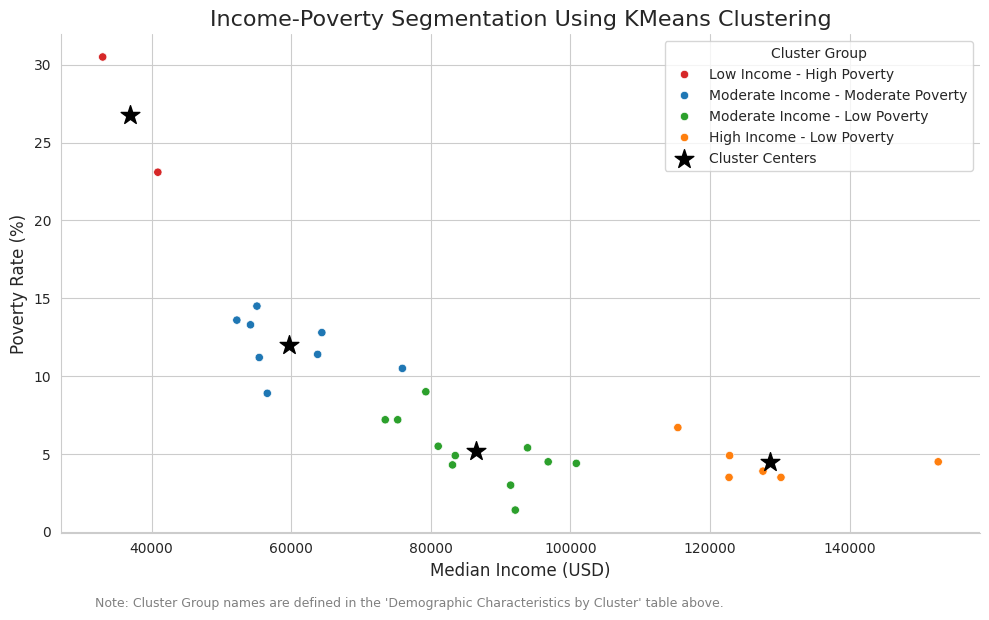

In [35]:
# Desired legend order
ordered_labels = [
    'Low Income - High Poverty',
    'Moderate Income - Moderate Poverty',
    'Moderate Income - Low Poverty',
    'High Income - Low Poverty'
]

# Scatterplot: Clustering by Income and Poverty
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Med_Income', y='Poverty', hue='Income_Poverty_Tier', palette='tab10')
plt.scatter(x=centers_original_bi1[:, 0], y=centers_original_bi1[:, 1], s=200, c='black', marker='*', label='Cluster Centers')

plt.title('Income-Poverty Segmentation Using KMeans Clustering', fontsize=16)
plt.xlabel('Median Income (USD)', fontsize=12)
plt.ylabel('Poverty Rate (%)', fontsize=12)

# Legend handling
handles, labels = plt.gca().get_legend_handles_labels()
ordered_labels_with_centers = ordered_labels + ['Cluster Centers']
handle_dict = dict(zip(labels, handles))
sorted_handles = [handle_dict[label] for label in ordered_labels_with_centers if label in handle_dict]

plt.legend(sorted_handles, ordered_labels_with_centers, title='Cluster Group')

plt.figtext(0.1, -0.02, "Note: Cluster Group names are defined in the 'Demographic Characteristics by Cluster' table above.",
            wrap=True, horizontalalignment='left', fontsize=9, color='gray')

sns.despine()
plt.tight_layout()
plt.show()

Bivariate Cluster #2

To get a more accurate categorization of income tiers, we can combine Population Density and recategorize each zip code based on our findings

In [36]:
# Calculate Population Density based on Zip Code Area
SQFT_PER_SQMI = 27878400

df['Population_Density'] = df['Total_Pop'] / (df['Zip_Area'] / SQFT_PER_SQMI)

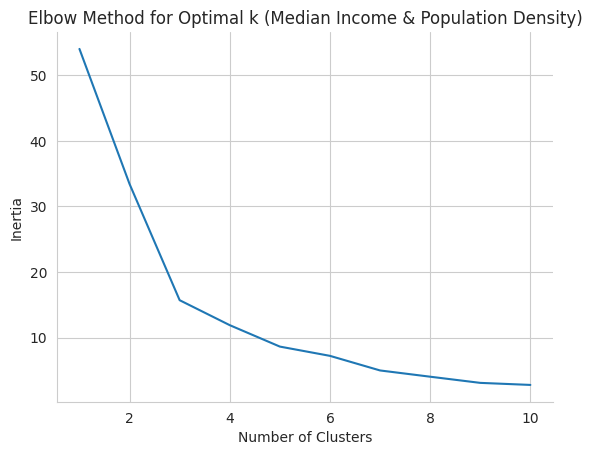

In [37]:
# Step 1: Select and scale the features
features = df[['Med_Income', 'Population_Density']]
scaler_bi2 = StandardScaler()
scaled_feat_bi2 = scaler_bi2.fit_transform(features)

# Step 2: Elbow method to determine optimal number of clusters
inertia_scores = []
for i in range(1, 11):
    clusters = KMeans(n_clusters=i, random_state=42)
    clusters.fit(scaled_feat_bi2)
    inertia_scores.append(clusters.inertia_)

# Step 3: Plot the inertia to see the "elbow"
plt.plot(range(1, 11), inertia_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k (Median Income & Population Density)')
sns.despine()
plt.show()

In [38]:
# Step 4: Final KMeans clustering using optimal number of clusters
final_kmeans_bi2 = KMeans(n_clusters=3, random_state=42)
final_kmeans_bi2.fit(scaled_feat_bi2)
df['Income_Pop_Density_Cluster'] = final_kmeans_bi2.labels_

In [39]:
# Step 5: Analyze
# Get cluster centers (in scaled space)
centers_scaled_bi2 = final_kmeans_bi2.cluster_centers_

# Inverse transform to original space
centers_original_bi2 = scaler_bi2.inverse_transform(centers_scaled_bi2)

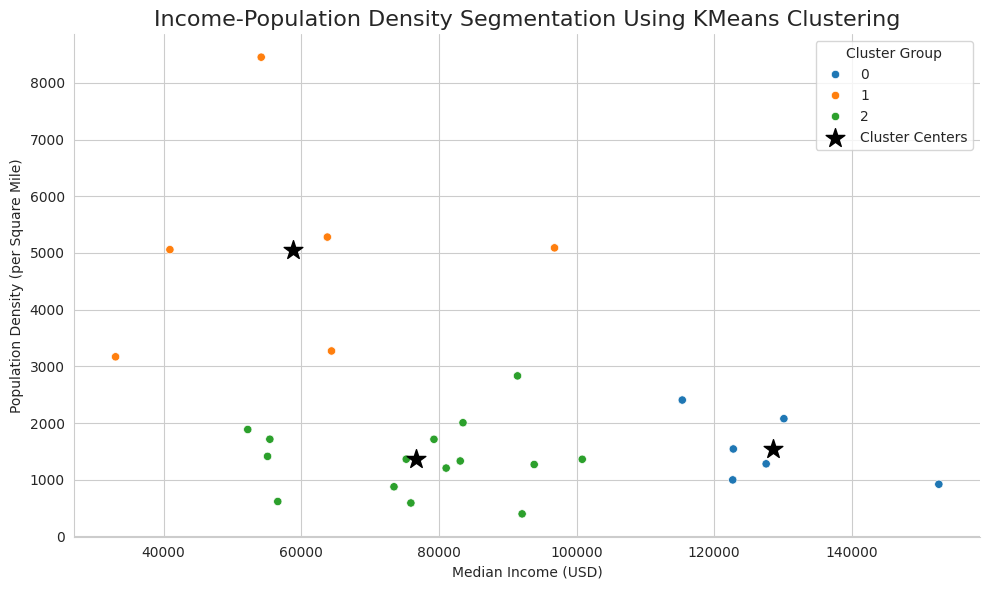

In [40]:
# Scatterplot: Clustering by Income and Population Density
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Med_Income', y='Population_Density', hue='Income_Pop_Density_Cluster', palette='tab10')
plt.scatter(x=centers_original_bi2[:, 0], y=centers_original_bi2[:, 1], s=200, c='black', marker='*', label='Cluster Centers')

plt.title('Income-Population Density Segmentation Using KMeans Clustering', fontsize=16)
plt.xlabel('Median Income (USD)')
plt.ylabel('Population Density (per Square Mile)')
plt.legend(title='Cluster Group')

sns.despine()
plt.tight_layout()
plt.show()

In [41]:
# Label clusters based on data
cluster_means_bi2 = df.groupby('Income_Pop_Density_Cluster')['Med_Income'].mean().sort_values()

cluster_labels = {}   # Map cluster IDs to labels
for i, cluster_id in enumerate(cluster_means_bi2.index):
    cluster_labels[cluster_id] = ['Mixed Income - High Density', 'Moderate Income - Medium Density', 'High Income - Medium Density'][i]

df['Income_Density_Tier'] = df['Income_Pop_Density_Cluster'].map(cluster_labels)  # Apply the labels

In [42]:
# Markdown Table
counts_bi2 = df['Income_Pop_Density_Cluster'].value_counts().sort_index()

print("### Cluster Counts\n")
print(counts_bi2.to_frame('Count').to_markdown())

means_bi1 = (
    df.groupby(['Income_Pop_Density_Cluster', 'Income_Density_Tier'])[
        ['Med_Income', 'Poverty', 'Food_Stamp']
    ]
    .mean()
    .sort_values('Med_Income')
)

markdown_table_bi1 = means_bi1.reset_index().to_markdown(index=False)

print("\n### Demographic Characteristics by Cluster\n")
print(markdown_table_bi1)

### Cluster Counts

|   Income_Pop_Density_Cluster |   Count |
|-----------------------------:|--------:|
|                            0 |       6 |
|                            1 |       6 |
|                            2 |      15 |

### Demographic Characteristics by Cluster

|   Income_Pop_Density_Cluster | Income_Density_Tier              |   Med_Income |   Poverty |   Food_Stamp |
|-----------------------------:|:---------------------------------|-------------:|----------:|-------------:|
|                            1 | Mixed Income - High Density      |      58846.8 |   15.9333 |     14.7031  |
|                            2 | Moderate Income - Medium Density |      76608.8 |    7.4    |      7.88614 |
|                            0 | High Income - Medium Density     |     128537   |    4.5    |      2.06233 |


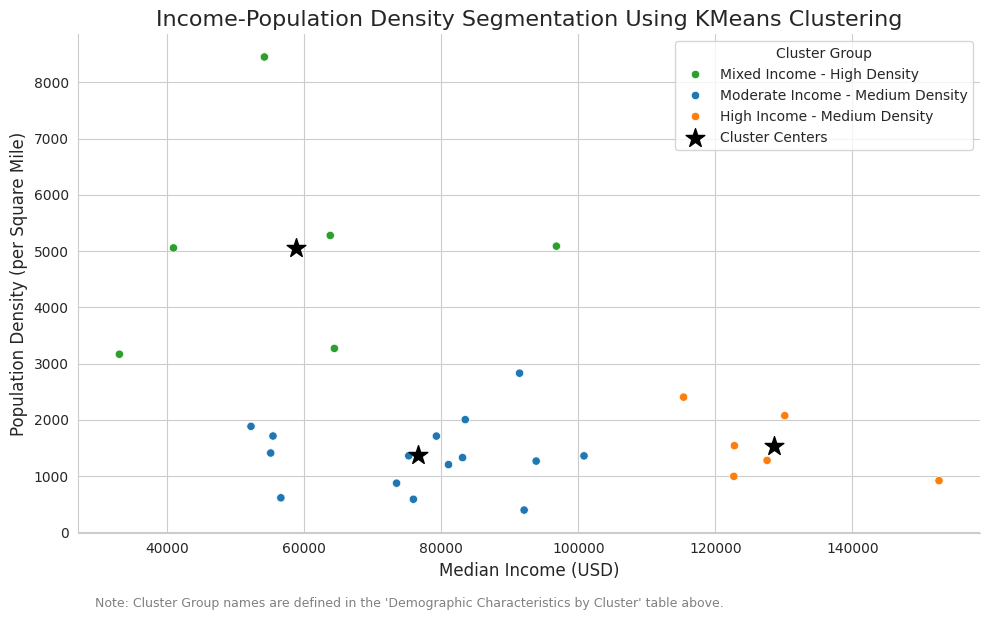

In [44]:
# Desired legend order
ordered_labels = [
    'Mixed Income - High Density',
    'Moderate Income - Medium Density',
    'High Income - Medium Density'
]

# Scatterplot: Clustering by Income and Population Density
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Med_Income', y='Population_Density', hue='Income_Density_Tier', palette='tab10')
plt.scatter(x=centers_original_bi2[:, 0], y=centers_original_bi2[:, 1], s=200, c='black', marker='*', label='Cluster Centers')

plt.title('Income-Population Density Segmentation Using KMeans Clustering', fontsize=16)
plt.xlabel('Median Income (USD)', fontsize=12)
plt.ylabel('Population Density (per Square Mile)', fontsize=12)
#plt.legend(title='Cluster Group')

# Legend handling
handles, labels = plt.gca().get_legend_handles_labels()
ordered_labels_with_centers = ordered_labels + ['Cluster Centers']
handle_dict = dict(zip(labels, handles))
sorted_handles = [handle_dict[label] for label in ordered_labels_with_centers if label in handle_dict]

plt.legend(sorted_handles, ordered_labels_with_centers, title='Cluster Group')

plt.figtext(0.1, -0.02, "Note: Cluster Group names are defined in the 'Demographic Characteristics by Cluster' table above.",
            wrap=True, horizontalalignment='left', fontsize=9, color='gray')

sns.despine()
plt.tight_layout()
plt.show()

In [45]:
df[df['Income_Density_Tier'] == 'Mixed Income - High Density']['Med_Income'].sort_values(ascending=False)

,Med_Income
23,96804
18,64393
8,63792
7,54176
21,40907
16,33009


In [46]:
df.iloc[23]

,23
ZIP,60089
Total_Pop,41584
White,74.639284
Black,1.928626
Asian,17.809735
Hispanic,3.898134
No_English,32.6
Under_5,5.0
Under_18,22.9
18_to_64,63.7


In [47]:
df[df['Income_Density_Tier'] == 'Moderate Income - Medium Density']['Population_Density'].sort_values(ascending=False).head()

,Population_Density
15,2831.363654
5,2005.527660
22,1885.874738
3,1714.356441
14,1712.947714


In [48]:
df.iloc[15]

,15
ZIP,60061
Total_Pop,26144
White,64.661108
Black,0.864443
Asian,20.016065
Hispanic,11.325734
No_English,40.2
Under_5,6.0
Under_18,26.4
18_to_64,63.2


In [49]:
df[df['Income_Density_Tier'] == 'High Income - Medium Density']['Population_Density'].sort_values(ascending=False).head()

,Population_Density
6,2405.508346
2,2076.744325
1,1542.534529
12,1280.266719
13,996.804415


In [50]:
df.iloc[6]

,6
ZIP,60035
Total_Pop,29837
White,86.721185
Black,2.27905
Asian,2.460033
Hispanic,7.199115
No_English,15.9
Under_5,5.5
Under_18,25.2
18_to_64,54.0


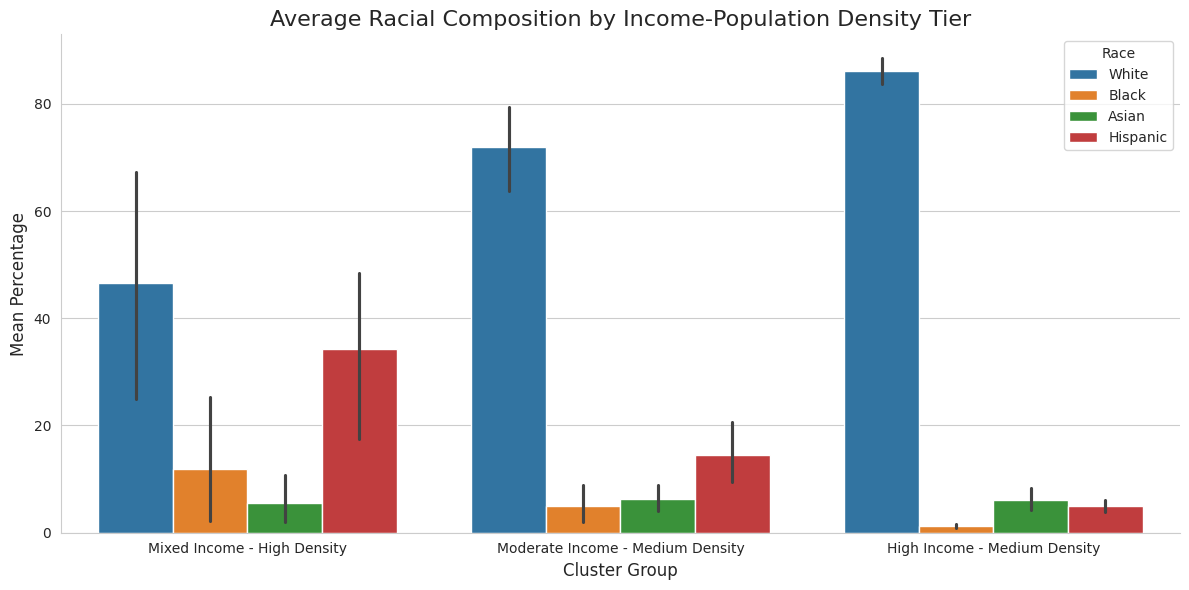

In [52]:
# Reshape data to long format
df_long_1 = df.melt(id_vars='Income_Density_Tier',
                  value_vars=['White', 'Black', 'Asian', 'Hispanic'],
                  var_name='Race',
                  value_name='Percentage')

df_long_1['Income_Density_Tier'] = pd.Categorical(  #reordering
    df_long_1['Income_Density_Tier'],
    categories=['Mixed Income - High Density', 'Moderate Income - Medium Density', 'High Income - Medium Density'],
    ordered=True
)

plt.figure(figsize=(12, 6))
sns.barplot(data=df_long_1, x='Income_Density_Tier', y='Percentage', hue='Race', estimator='mean')
plt.title('Average Racial Composition by Income-Population Density Tier', fontsize=16)
plt.xlabel('Cluster Group', fontsize=12)
plt.ylabel('Mean Percentage', fontsize=12)
plt.legend(title='Race')

sns.despine()
plt.tight_layout()
plt.show()

In [53]:
df.columns

Index(['ZIP', 'Total_Pop', 'White', 'Black', 'Asian', 'Hispanic', 'No_English',
       'Under_5', 'Under_18', '18_to_64', '65_Plus', 'Male', 'Female',
       'HS_Diploma', 'Associate', 'Bachelor', 'Food_Stamp', 'Med_Income',
       'Poverty', 'Zip_Area', 'Income_Cluster', 'Income_Poverty_Cluster',
       'Income_Poverty_Tier', 'Population_Density',
       'Income_Pop_Density_Cluster', 'Income_Density_Tier'],
      dtype='object')

Note that under 18 indicates under 5 is included within this category - so under 5 counted twice

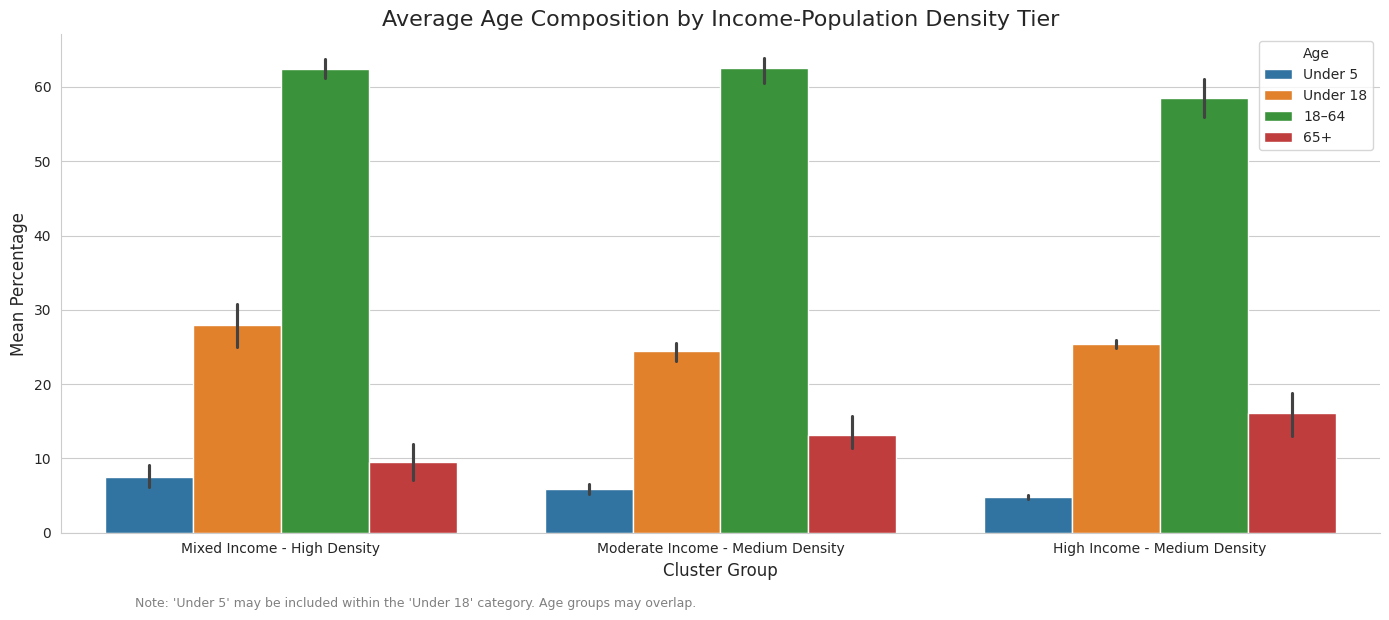

In [54]:
# Reshape data to long format
df_long_2 = df.melt(id_vars='Income_Density_Tier',
                  value_vars=['Under_5', 'Under_18', '18_to_64', '65_Plus'],
                  var_name='Age',
                  value_name='Percentage')

# Rename legend (Age) labels
age_map = {
    'Under_5': 'Under 5',
    'Under_18': 'Under 18',
    '18_to_64': '18–64',
    '65_Plus': '65+'
}
df_long_2['Age'] = df_long_2['Age'].replace(age_map)

df_long_2['Income_Density_Tier'] = pd.Categorical(  #reordering
    df_long_2['Income_Density_Tier'],
    categories=['Mixed Income - High Density', 'Moderate Income - Medium Density', 'High Income - Medium Density'],
    ordered=True
)

plt.figure(figsize=(14, 6))
sns.barplot(data=df_long_2, x='Income_Density_Tier', y='Percentage', hue='Age', estimator='mean')
plt.title('Average Age Composition by Income-Population Density Tier', fontsize=16)
plt.xlabel('Cluster Group', fontsize=12)
plt.ylabel('Mean Percentage', fontsize=12)
plt.legend(title='Age', loc='upper right', bbox_to_anchor=(1, 1))

plt.figtext(0.1, -0.02, "Note: 'Under 5' may be included within the 'Under 18' category. Age groups may overlap.",
            wrap=True, horizontalalignment='left', fontsize=9, color='gray')

sns.despine()
plt.tight_layout()
plt.show()

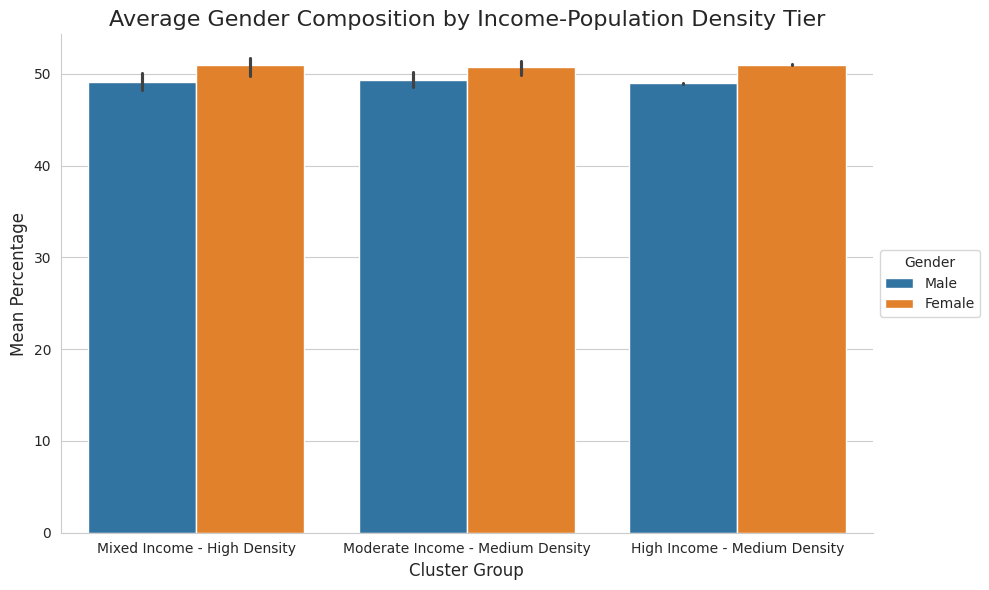

In [55]:
# Reshape data to long format
df_long_3 = df.melt(id_vars='Income_Density_Tier',
                  value_vars=['Male', 'Female'],
                  var_name='Gender',
                  value_name='Percentage')

df_long_3['Income_Density_Tier'] = pd.Categorical(  #reordering
    df_long_3['Income_Density_Tier'],
    categories=['Mixed Income - High Density', 'Moderate Income - Medium Density', 'High Income - Medium Density'],
    ordered=True
)

plt.figure(figsize=(10, 6))
sns.barplot(data=df_long_3, x='Income_Density_Tier', y='Percentage', hue='Gender', estimator='mean')
plt.title('Average Gender Composition by Income-Population Density Tier', fontsize=16)
plt.xlabel('Cluster Group', fontsize=12)
plt.ylabel('Mean Percentage', fontsize=12)
plt.legend(title='Gender', loc='center left', bbox_to_anchor=(1, 0.5))

sns.despine()
plt.tight_layout()
plt.show()

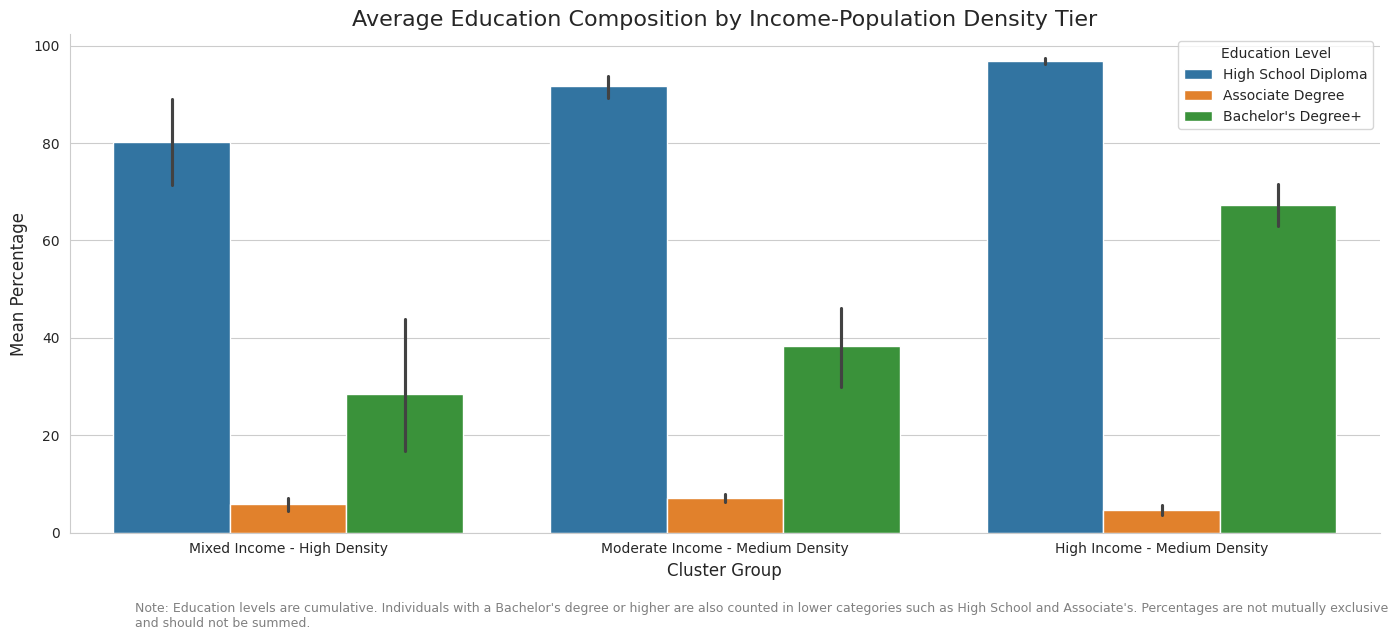

In [56]:
# Reshape data to long format
df_long_4 = df.melt(id_vars='Income_Density_Tier',
                  value_vars=['HS_Diploma', 'Associate', 'Bachelor'],
                  var_name='Education',
                  value_name='Percentage')

# Rename legend (Education) labels
ed_map = {
    'HS_Diploma': 'High School Diploma',
    'Associate': 'Associate Degree',
    'Bachelor': "Bachelor's Degree+"
}
df_long_4['Education'] = df_long_4['Education'].replace(ed_map)

df_long_4['Income_Density_Tier'] = pd.Categorical(  #reordering
    df_long_4['Income_Density_Tier'],
    categories=['Mixed Income - High Density', 'Moderate Income - Medium Density', 'High Income - Medium Density'],
    ordered=True
)

plt.figure(figsize=(14, 6))
sns.barplot(data=df_long_4, x='Income_Density_Tier', y='Percentage', hue='Education', estimator='mean')
plt.title('Average Education Composition by Income-Population Density Tier', fontsize=16)
plt.xlabel('Cluster Group', fontsize=12)
plt.ylabel('Mean Percentage', fontsize=12)
plt.legend(title='Education Level', loc='upper right', bbox_to_anchor=(1, 1))

plt.figtext(0.1, -0.05, "Note: Education levels are cumulative. Individuals with a Bachelor's degree or higher are also counted in lower categories such as High School and Associate's. Percentages are not mutually exclusive and should not be summed.",
            wrap=True, horizontalalignment='left', fontsize=9, color='gray')

sns.despine()
plt.tight_layout()
plt.show()

In [57]:
df_final = df.iloc[[23, 15, 6]].copy()
df_final

,ZIP,Total_Pop,White,Black,Asian,Hispanic,No_English,Under_5,Under_18,18_to_64,...,Food_Stamp,Med_Income,Poverty,Zip_Area,Income_Cluster,Income_Poverty_Cluster,Income_Poverty_Tier,Population_Density,Income_Pop_Density_Cluster,Income_Density_Tier
23,60089,41584,74.639284,1.928626,17.809735,3.898134,32.6,5.0,22.9,63.7,...,3.356695,96804,4.5,2.277724e+08,2,2,Moderate Income - Low Poverty,5089.709169,1,Mixed Income - High Density
15,60061,26144,64.661108,0.864443,20.016065,11.325734,40.2,6.0,26.4,63.2,...,5.182641,91426,3.0,2.574212e+08,2,2,Moderate Income - Low Poverty,2831.363654,2,Moderate Income - Medium Density
6,60035,29837,86.721185,2.279050,2.460033,7.199115,15.9,5.5,25.2,54.0,...,2.725385,115372,6.7,3.457929e+08,0,0,High Income - Low Poverty,2405.508346,0,High Income - Medium Density


In [58]:
df_final.columns

Index(['ZIP', 'Total_Pop', 'White', 'Black', 'Asian', 'Hispanic', 'No_English',
       'Under_5', 'Under_18', '18_to_64', '65_Plus', 'Male', 'Female',
       'HS_Diploma', 'Associate', 'Bachelor', 'Food_Stamp', 'Med_Income',
       'Poverty', 'Zip_Area', 'Income_Cluster', 'Income_Poverty_Cluster',
       'Income_Poverty_Tier', 'Population_Density',
       'Income_Pop_Density_Cluster', 'Income_Density_Tier'],
      dtype='object')

In [59]:
df_final['ZIP'] = pd.Categorical(  #reordering
    df_final['ZIP'],
    categories=[60089, 60061, 60035],
    ordered=True
)

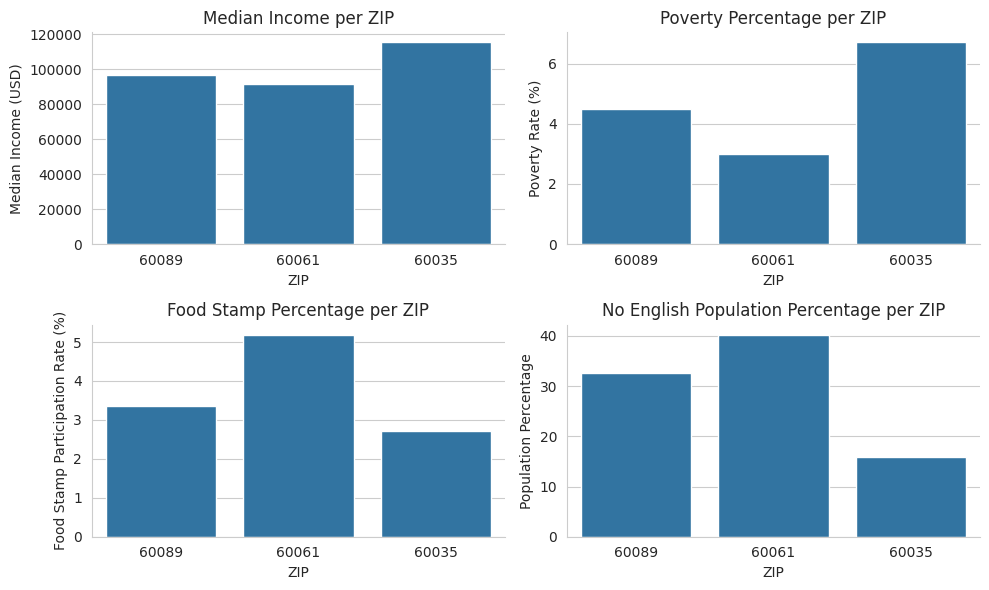

In [60]:
fig, ax = plt.subplots(2, 2, figsize=(10, 6))

sns.barplot(x="ZIP", y="Med_Income", data=df_final, ax=ax[0, 0])
ax[0, 0].set_title("Median Income per ZIP")
ax[0, 0].set_ylabel("Median Income (USD)")

sns.barplot(x="ZIP", y="Poverty", data=df_final, ax=ax[0, 1])
ax[0, 1].set_title("Poverty Percentage per ZIP")
ax[0, 1].set_ylabel("Poverty Rate (%)")

sns.barplot(x="ZIP", y="Food_Stamp", data=df_final, ax=ax[1, 0])
ax[1, 0].set_title("Food Stamp Percentage per ZIP")
ax[1, 0].set_ylabel("Food Stamp Participation Rate (%)")


sns.barplot(x="ZIP", y="No_English", data=df_final, ax=ax[1, 1])
ax[1, 1].set_title("No English Population Percentage per ZIP")
ax[1, 1].set_ylabel("Population Percentage")

sns.despine()
plt.tight_layout()
plt.show()

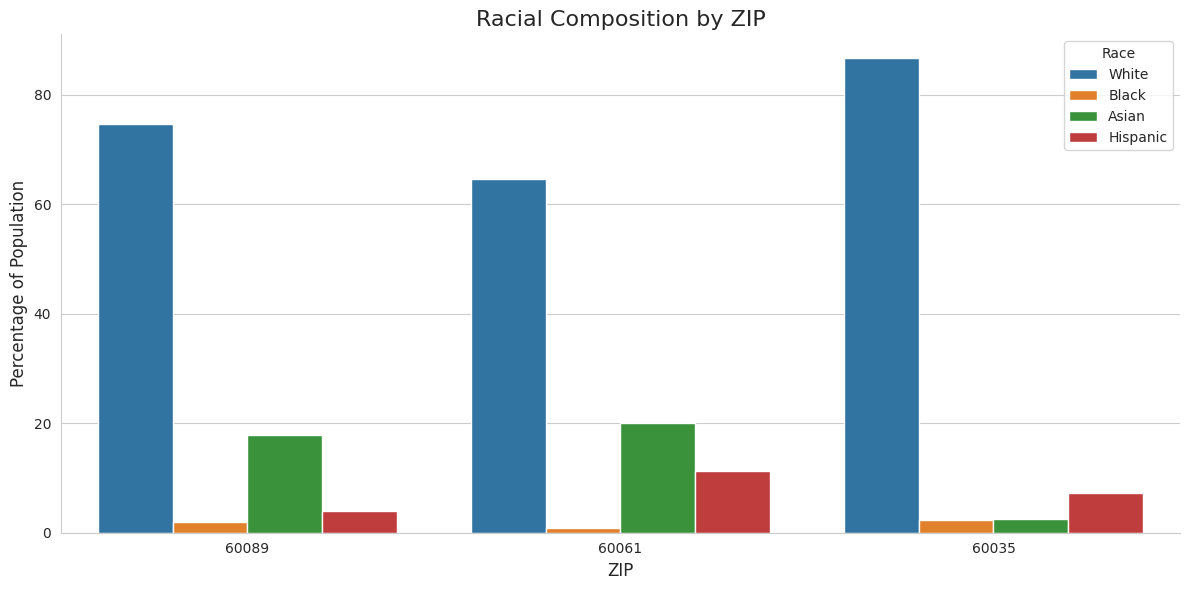

In [62]:
df_long_5 = df_final.melt(id_vars='ZIP',
                  value_vars=['White', 'Black', 'Asian', 'Hispanic'],
                  var_name='Race',
                  value_name='Percentage')

plt.figure(figsize=(12, 6))
sns.barplot(data=df_long_5, x='ZIP', y='Percentage', hue='Race')
plt.title('Racial Composition by ZIP', fontsize=16)
plt.xlabel('ZIP', fontsize=12)
plt.ylabel('Percentage of Population', fontsize=12)
plt.legend(title='Race')

sns.despine()
plt.tight_layout()
plt.show()

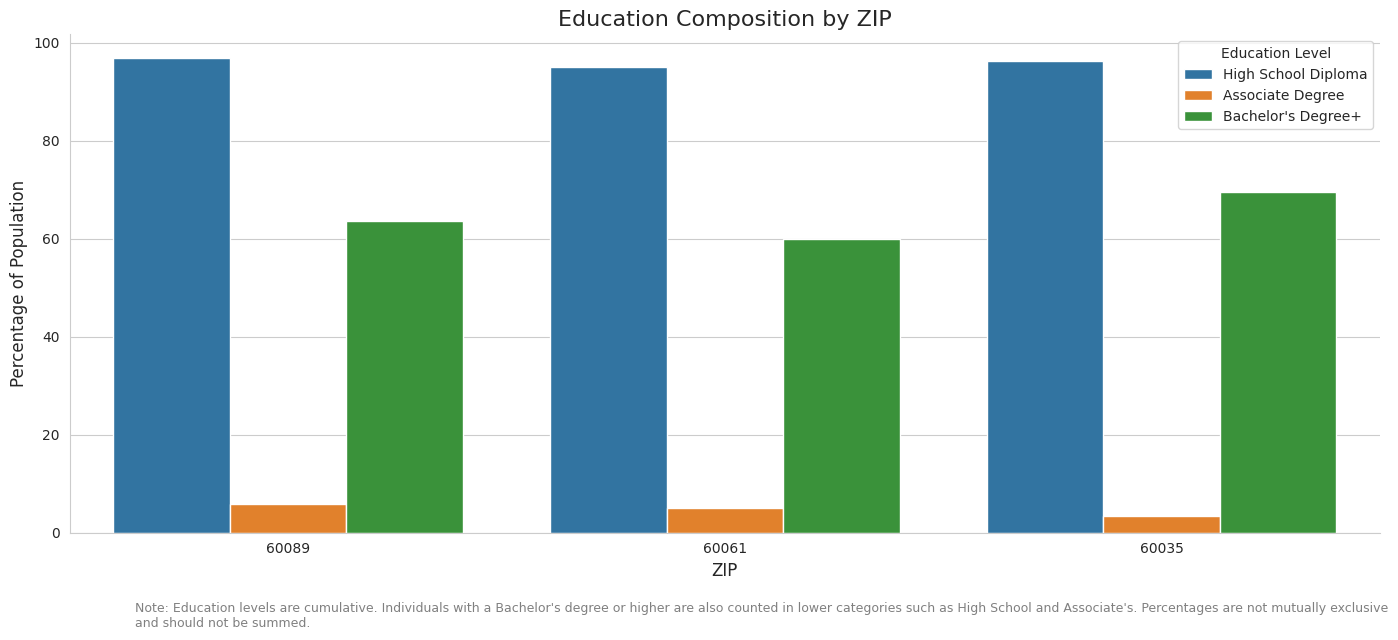

In [63]:
df_long_6 = df_final.melt(id_vars='ZIP',
                  value_vars=['HS_Diploma', 'Associate', 'Bachelor'],
                  var_name='Education',
                  value_name='Percentage')

ed2_map = {
    'HS_Diploma': 'High School Diploma',
    'Associate': 'Associate Degree',
    'Bachelor': "Bachelor's Degree+"
}
df_long_6['Education'] = df_long_6['Education'].replace(ed2_map)

plt.figure(figsize=(14, 6))
sns.barplot(data=df_long_6, x='ZIP', y='Percentage', hue='Education')
plt.title('Education Composition by ZIP', fontsize=16)
plt.xlabel('ZIP', fontsize=12)
plt.ylabel('Percentage of Population', fontsize=12)
plt.legend(title='Education Level', loc='upper right', bbox_to_anchor=(1, 1))

plt.figtext(0.1, -0.05, "Note: Education levels are cumulative. Individuals with a Bachelor's degree or higher are also counted in lower categories such as High School and Associate's. Percentages are not mutually exclusive and should not be summed.",
            wrap=True, horizontalalignment='left', fontsize=9, color='gray')

sns.despine()
plt.tight_layout()
plt.show()

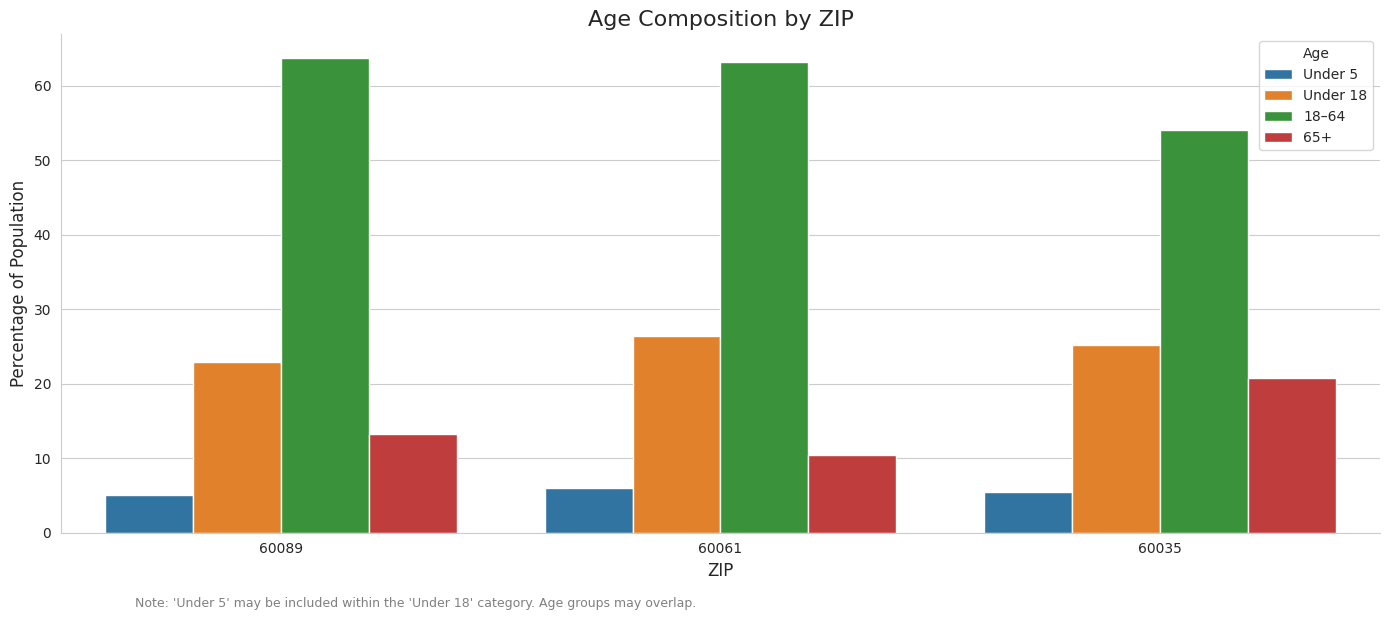

In [64]:
df_long_7 = df_final.melt(id_vars='ZIP',
                  value_vars=['Under_5', 'Under_18', '18_to_64', '65_Plus'],
                  var_name='Age',
                  value_name='Percentage')

age_map = {
    'Under_5': 'Under 5',
    'Under_18': 'Under 18',
    '18_to_64': '18–64',
    '65_Plus': '65+'
}
df_long_7['Age'] = df_long_7['Age'].replace(age_map)

plt.figure(figsize=(14, 6))
sns.barplot(data=df_long_7, x='ZIP', y='Percentage', hue='Age')
plt.title('Age Composition by ZIP', fontsize=16)
plt.xlabel('ZIP', fontsize=12)
plt.ylabel('Percentage of Population', fontsize=12)
plt.legend(title='Age', loc='upper right', bbox_to_anchor=(1, 1))

plt.figtext(0.1, -0.02, "Note: 'Under 5' may be included within the 'Under 18' category. Age groups may overlap.",
            wrap=True, horizontalalignment='left', fontsize=9, color='gray')

sns.despine()
plt.tight_layout()
plt.show()